# Resource Utilization of Pandas and Spark DataFtame 

### Import the required libraries

In [1]:
import pandas as pd
from pyspark.sql import SparkSession
import psutil
import time

### Create a Spark session to work with Spark DataFrames

In [2]:
spark = SparkSession.builder \
    .appName("Resource Utilization") \
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/05/06 07:39:45 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### Loading the Enron email dataset

In [3]:
# Load the dataset using Pandas
pandas_df = pd.read_csv("emails.csv")

# Load the dataset using Spark
spark_df = spark.read.csv("emails.csv", header=True, inferSchema=True)


### Create a function that will utilize the psutil library to measure the CPU, memory, and disk usage before and after executing a given operation.

In [4]:
def measure_resource_utilization(operation, dataframe):
    # Get initial resource usage
    cpu_percent_initial = psutil.cpu_percent()
    memory_initial = psutil.virtual_memory().used
    disk_initial = psutil.disk_usage('/').used

    print("Initial resource usage captured.")

    # Perform the operation
    try:
        start_time = time.time()
        operation(dataframe)
        end_time = time.time()
        print("Operation completed.")
    except Exception as e:
        print("Error during operation:", e)
        return None, None, None, None

    # Get final resource usage
    cpu_percent_final = psutil.cpu_percent()
    memory_final = psutil.virtual_memory().used
    disk_final = psutil.disk_usage('/').used

    print("Final resource usage captured.")

    # Calculate resource usage and time taken
    cpu_percent_diff = cpu_percent_final - cpu_percent_initial
    memory_diff = memory_final - memory_initial
    disk_diff = disk_final - disk_initial
    time_taken = end_time - start_time

    return cpu_percent_diff, memory_diff, disk_diff, time_taken


### Check the column names in the dataset

In [5]:
# Print Pandas DataFrame columns
print("Pandas DataFrame columns:", pandas_df.columns)

# Print Spark DataFrame columns
print("Spark DataFrame columns:", spark_df.columns)

Pandas DataFrame columns: Index(['file', 'message'], dtype='object')
Spark DataFrame columns: ['file', 'message']


### Define operations we want to execute 

In [6]:
def operation_pandas(dataframe):
    result = dataframe.groupby("message").size().sort_values(ascending=False)

def operation_spark(dataframe):
    result = dataframe.groupBy("message").count().orderBy("count", ascending=False)


### Measure resource utilization

In [7]:
# Measure resource utilization for Pandas
cpu_pd, mem_pd, disk_pd, time_pd = measure_resource_utilization(operation_pandas, pandas_df)

# Measure resource utilization for Spark
cpu_sp, mem_sp, disk_sp, time_sp = measure_resource_utilization(operation_spark, spark_df)


Initial resource usage captured.
Operation completed.
Final resource usage captured.
Initial resource usage captured.
Operation completed.
Final resource usage captured.


### Resource utilization and performance of Pandas and Spark DataFrames based on the calculated metrics

In [8]:
print("Pandas - CPU: {:.2f}%, Memory: {:.2f} MB, Disk: {:.2f} MB, Time: {:.2f} s".format(
    cpu_pd, mem_pd / (1024**2), disk_pd / (1024**2), time_pd))

print("Spark - CPU: {:.2f}%, Memory: {:.2f} MB, Disk: {:.2f} MB, Time: {:.2f} s".format(
    cpu_sp, mem_sp / (1024**2), disk_sp / (1024**2), time_sp))

Pandas - CPU: -9.60%, Memory: 39.92 MB, Disk: 1.09 MB, Time: 3.74 s
Spark - CPU: 39.40%, Memory: 0.54 MB, Disk: 0.00 MB, Time: 0.09 s


### Graph for visualizing the result comparison

In [9]:
import matplotlib.pyplot as plt
import numpy as np

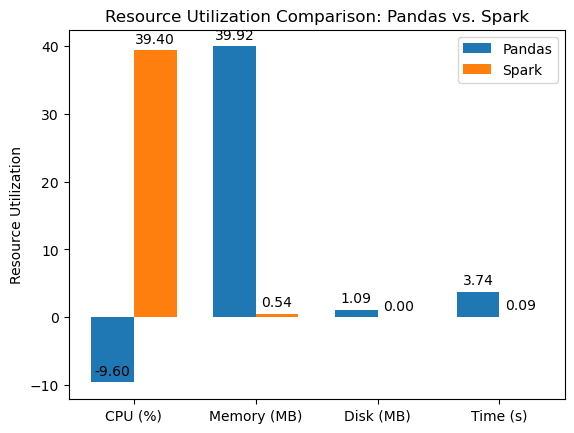

In [12]:
# Set up data for the bar graph
labels = ['CPU (%)', 'Memory (MB)', 'Disk (MB)', 'Time (s)']
pandas_data = [cpu_pd, mem_pd / (1024**2), disk_pd / (1024**2), time_pd]
spark_data = [cpu_sp, mem_sp / (1024**2), disk_sp / (1024**2), time_sp]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Create the bar graph
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, pandas_data, width, label='Pandas')
rects2 = ax.bar(x + width/2, spark_data, width, label='Spark')

# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('Resource Utilization')
ax.set_title('Resource Utilization Comparison: Pandas vs. Spark')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to label the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Show the bar graph
plt.show()

# Scalability Evaluation

In [13]:
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession

In [14]:
# Create subsets of the Enron email dataset
subset_sizes = np.linspace(0.1, 1.0, 10)  # 10%, 20%, ..., 100%
subsets_pandas = [pandas_df.sample(frac=size) for size in subset_sizes]
subsets_spark = [spark_df.sample(fraction=size) for size in subset_sizes]

# Initialize lists to store the results
results_pandas = []
results_spark = []

# Measure execution time and resource utilization for each subset
for subset_pd, subset_sp in zip(subsets_pandas, subsets_spark):
    results_pandas.append(measure_resource_utilization(operation_pandas, subset_pd))
    results_spark.append(measure_resource_utilization(operation_spark, subset_sp))

Initial resource usage captured.
Operation completed.
Final resource usage captured.
Initial resource usage captured.
Operation completed.
Final resource usage captured.
Initial resource usage captured.
Operation completed.
Final resource usage captured.
Initial resource usage captured.
Operation completed.
Final resource usage captured.
Initial resource usage captured.
Operation completed.
Final resource usage captured.
Initial resource usage captured.
Operation completed.
Final resource usage captured.
Initial resource usage captured.
Operation completed.
Final resource usage captured.
Initial resource usage captured.
Operation completed.
Final resource usage captured.
Initial resource usage captured.
Operation completed.
Final resource usage captured.
Initial resource usage captured.
Operation completed.
Final resource usage captured.
Initial resource usage captured.
Operation completed.
Final resource usage captured.
Initial resource usage captured.
Operation completed.
Final resou

### Create separate graphs for each metric

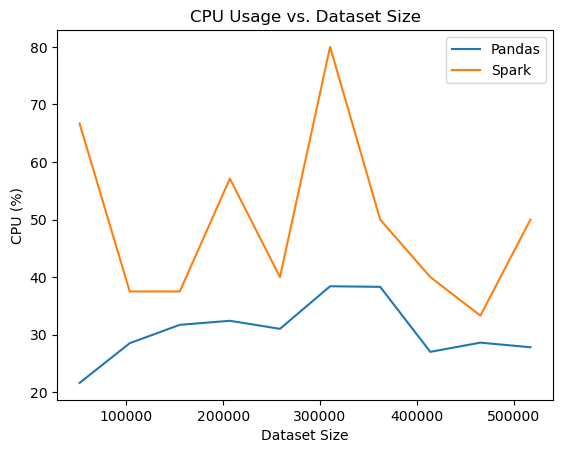

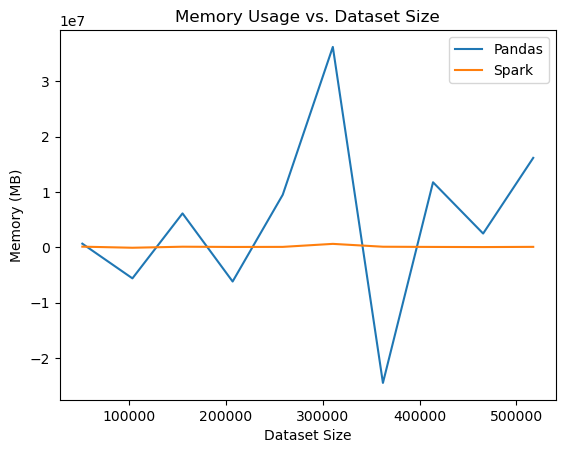

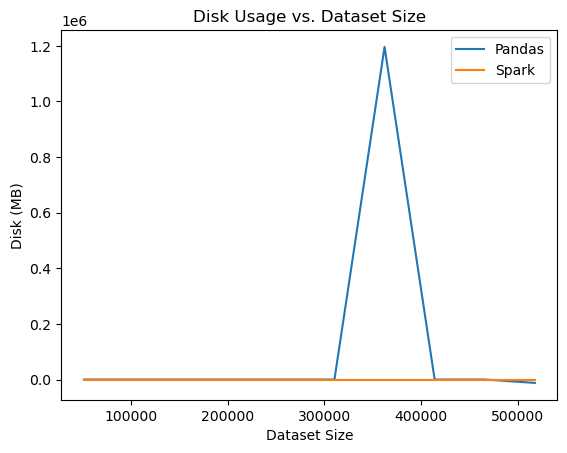

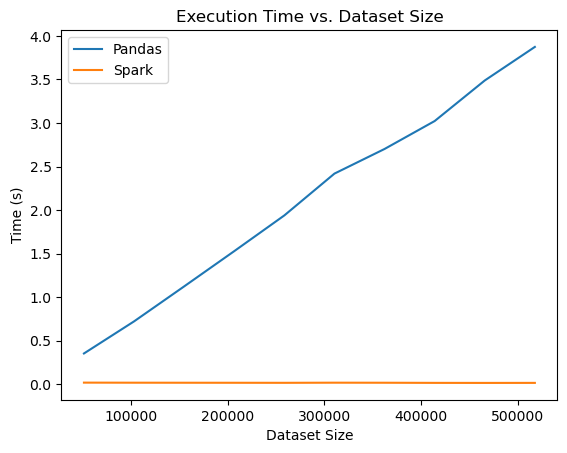

In [15]:
import matplotlib.pyplot as plt

# Plot the results
def plot_metric(metric_index, metric_name, y_label):
    plt.figure()
    plt.plot(subset_sizes * len(pandas_df), [result[metric_index] for result in results_pandas], label="Pandas")
    plt.plot(subset_sizes * len(pandas_df), [result[metric_index] for result in results_spark], label="Spark")
    plt.xlabel("Dataset Size")
    plt.ylabel(y_label)
    plt.title(f"{metric_name} vs. Dataset Size")
    plt.legend()
    plt.show()

# Plot CPU usage
plot_metric(0, "CPU Usage", "CPU (%)")

# Plot memory usage
plot_metric(1, "Memory Usage", "Memory (MB)")

# Plot disk usage
plot_metric(2, "Disk Usage", "Disk (MB)")

# Plot execution time
plot_metric(3, "Execution Time", "Time (s)")
